In [1]:
from jetset.data_loader import Data, ObsData
from jetset.cosmo_tools import Cosmo
from astropy import units as u
from IPython.core.display import display, HTML
import numpy as np
from jetset.base_model import Model
from jetset.model_manager import FitModel
from jetset.model_parameters import ModelParameterArray, ModelParameter
from jetset.analytical_model import AnalyticalParameter
from jetset.spectral_shapes import SED
from jetset.analytical_model import Disk
from jetset.jet_model import Jet
from jetset.plot_sedfit import PlotSED
from jetset_models.models import *
from jetset.jetkernel import jetkernel 
from jet_setup import JetSetup

from astropy import units as u
from astropy import constants as const
from astropy import time
import copy
from model_tools import *

#%config InlineBackend.figure_format = 'retina'

In [2]:
t=time.Time('58200',format='mjd')

In [3]:
t=time.Time('2018-04-12 00:00:00.000',format='iso')

In [4]:
t.mjd

58220.0

<img src="images/obs_log.png" alt="Drawing" style="width: 500px;"/>
<img src="images/bat_lc.png" alt="Drawing" style="width: 500px;"/>


LC

https://arxiv.org/pdf/1808.07875.pdf

uvot UW2 data point 

In [5]:
l=1928*u.angstrom
nu=l.to('Hz',equivalencies=u.spectral())
print('%e'%nu.value)

1.554940e+15


In [6]:
l=0.3*u.keV
nu=l.to('Hz',equivalencies=u.spectral())
print('%e'%nu.value)

7.253968e+16


ATel #11533

Filter - Wavelength(μm) - F_ν(mJy; Apr 8) - F_ν(mJy; Apr 9)

B11.7 - 11.52 - 376 - 378

B10.7 - 10.65 - 353 - 368

J8.9 - 8.72 - 303 - 297

M-band - 4.85 - 292 - 271 

In [7]:
def conv_to_seddata_atel(d):
    l=d[0]
    F_nu_obs1=d[1]
    F_nu_obs2=d[2]
    nu=l.to('Hz',equivalencies=u.spectral())
    f1=F_nu_obs1.to('erg cm-2 s-1 Hz-1')*nu
    f2=F_nu_obs2.to('erg cm-2 s-1 Hz-1')*nu
    return nu.value, f1.value, f2.value, ((f1+f2)*.5).value,((f1+f2)*.5).value*0.1

In [8]:
print('%e'%34379869036697.242)

3.437987e+13


In [9]:
d1=(11.52*u.micrometer,376*u.mJy,378*u.mJy)
d2=(10.65*u.micrometer,353*u.mJy,368*u.mJy)
d3=(8.72*u.micrometer,303*u.mJy,297*u.mJy)
d4=(4.85*u.micrometer,292*u.mJy,271*u.mJy)

In [10]:
print(conv_to_seddata_atel(d1))
print(conv_to_seddata_atel(d2))
print(conv_to_seddata_atel(d3))
print(conv_to_seddata_atel(d4))

(26023650868055.555, 9.78489272638889e-11, 9.836940028125001e-11, 9.810916377256945e-11, 9.810916377256946e-12)
(28149526572769.953, 9.936782880187793e-11, 1.0359025778779343e-10, 1.0147904329483567e-10, 1.0147904329483567e-11)
(34379869036697.242, 1.0417100318119265e-10, 1.0210821103899082e-10, 1.0313960711009173e-10, 1.0313960711009174e-11)
(61812877938144.336, 1.8049360357938148e-10, 1.6751289921237115e-10, 1.740032513958763e-10, 1.740032513958763e-11)


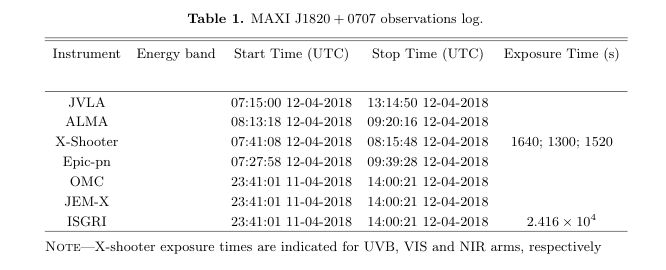

# Broadband model  for the paper

https://www.overleaf.com/project/5e626965d29ac700011e7886

## Parameters and Data from observations

### distance

In [11]:
d=3*u.kpc
cosmo=Cosmo(DL_cm=d.to('cm'))
print(cosmo.get_DL_cm())

using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero
9.257032744474102e+21


In [12]:
pwd

'/Users/orion/astro/JetSeT/JetSeT_JessicaLuna'

## Obs Data

In [13]:
nu_range_disk_corona=[5.3E14,1E22]
nu_range_syst_disk_corona=[1E8,1E16]
system_disk_corona=0.05
sed_data_deabs_binned_disk_corona=build_data('SED_MAXIJ1820v09_no_deabs.ecsv',cosmo,bin_width=0.1,systematcis_list=[[system_disk_corona,nu_range_syst_disk_corona]],deabs=True,NH=1.3E21)
sed_data_deabs_unbinned_disk_corona=build_data('SED_MAXIJ1820v09_no_deabs.ecsv',cosmo,systematcis_list=[[system_disk_corona,nu_range_syst_disk_corona]],deabs=True,NH=1.3E21)

nu_range_jet=[1E8,1E22]
nu_range_jet_fit=[1E8,1E22]

nu_range_syst_jet=[1E8,1E16]
system_jet=0.05
sed_data_deabs_binned_jet=build_data('SED_MAXIJ1820v09_no_deabs.ecsv',cosmo,bin_width=0.1,systematcis_list=[[system_jet,nu_range_syst_jet]],deabs=True,NH=1.3E21)
sed_data_deabs_unbinned_jet=build_data('SED_MAXIJ1820v09_no_deabs.ecsv',cosmo,systematcis_list=[[system_jet,nu_range_syst_jet]],deabs=True,NH=1.3E21)

sed_data_no_deabs=build_data('SED_MAXIJ1820v09_no_deabs.ecsv',cosmo,deabs=False)


***  binning data  ***
---> N bins= 113
---> bin_widht= 0.1


***  binning data  ***
---> N bins= 113
---> bin_widht= 0.1



/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/astropy/table/table.py:1187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]
/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/astropy/table/table.py:1187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


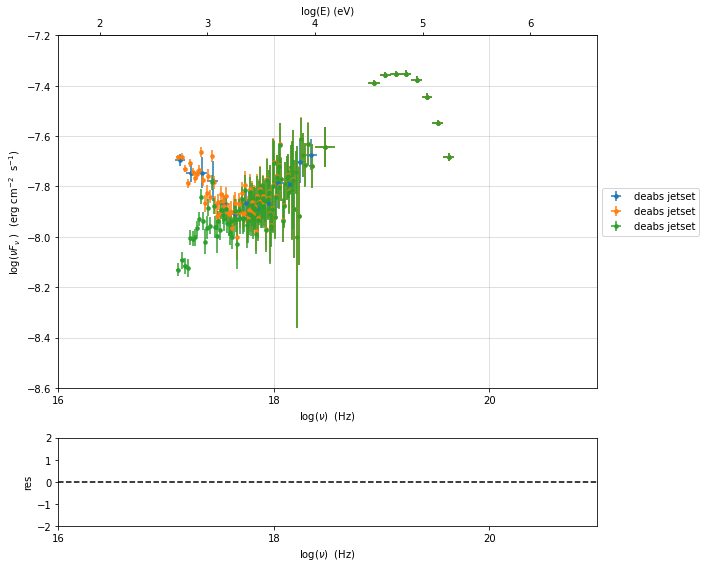

In [14]:
p=sed_data_deabs_binned_disk_corona.plot_sed()
sed_data_deabs_unbinned_disk_corona.plot_sed(plot_obj=p)
sed_data_no_deabs.plot_sed(plot_obj=p)

p.rescale(y_max=-7.2,y_min=-8.6,x_min=16,x_max=21)

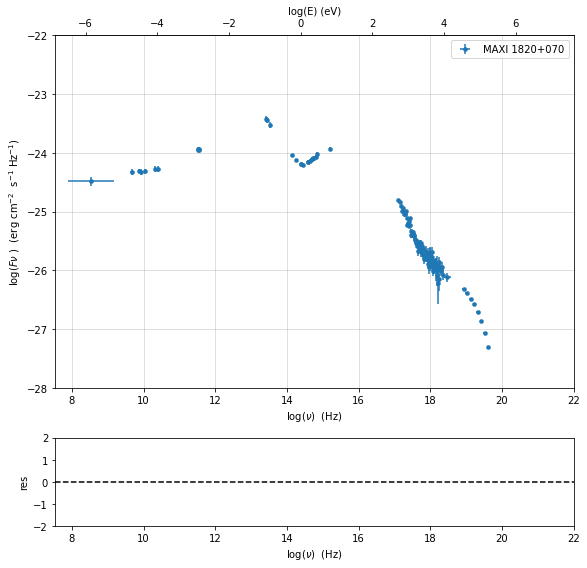

In [15]:
sed_data_deabs_unbinned_disk_corona.obj_name='MAXI 1820+070'
p=sed_data_deabs_unbinned_disk_corona.plot_sed(density=True)
p.sedplot.legend(loc='best')
p.rescale(y_min=-28,y_max=-22,x_max=22)


## size of radio jet

Soruce size is estimated from Bright+2020 (https://arxiv.org/pdf/2003.01083.pdf, page 46) using an angluar size of ~0.01" at MJD ~ 58220

In [16]:
Radio_jet_size=3*u.kpc*np.tan(0.01*u.arcsec.to('rad'))

In [17]:
print(Radio_jet_size),print(Radio_jet_size.to('AU')),print(Radio_jet_size.to('cm'))
print(np.log10(Radio_jet_size.to('cm').value))

1.4544410433286091e-07 kpc
30.00000000000002 AU
448793612100000.4 cm
14.652046666765342


## beaming factor

In [18]:
beta=0.89
BulkFactor=1.0/np.sqrt(1-beta**2)
theta=63

In [19]:
print(BulkFactor)

2.1931723165325634


## BH

In [20]:
M_BH=8 #Solar masses
Rs=jetkernel.eval_R_Sw(8)
print('Sw Radius %e'%Rs) #cm

Sw Radius 2.362831e+06


## Optical depth and pair production

In [21]:
def tau_optical(N_e,R):
    return const.sigma_T.to('cm2').value*R*N_e

def sigma_gg_delta(nu_seed,nu_target):
    return (1./3)

def tau_gg_nuLnu_limit(nu_seed,R,tau_limit,cosmo):
    nu_target=4E40/nu_seed
    n_limit=tau_limit/(const.sigma_T.to('cm2').value*R)
    nuLnu_limit = np.pi*4*R**2*const.c.to('cm/s').value * n_limit * nu_target*const.h.cgs.value
    return nu_target,nuLnu_limit,nuLnu_limit/(cosmo.get_DL_cm()**2 * np.pi * 4)


# Models

## Corona 

![corona_analyt_model](images/Corona_analyt_model.png)

In [22]:
soft_excess_T=(0.15*1000*u.eV)/const.k_B
print('soft_excess_T =%e (1E6 K)'%(soft_excess_T.to('K')/1E6).value)

soft_excess_T =1.740678e+00 (1E6 K)


In [23]:
soft_excess_T=soft_excess_T.to('K').value

In [24]:
(0.122*u.keV/const.k_B).to('K').value

1415751.21082911

In [25]:
(1.7E6*u.K*const.k_B).to('keV')

<Quantity 0.14649467 keV>

## Corona + Diskirr

application to MAXI 1820+070 in:
https://arxiv.org/abs/1810.11222v1

model from:
doi:10.1111/j.1365-2966.2008.14166.x
        

/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)
/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
disk_irr,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
disk_irr,L_Disk,bolobmetric disk lum.,erg / s,1.100000e+37,0.000000e+00,--,False,False
disk_irr,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
disk_irr,r_out,disk r_out (r_in),,5.000000e+03,1.000000e+00,--,False,False
disk_irr,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
disk_irr,L_Comp_ratio,L_Comp/L_Disk,,4.500000e+00,0.000000e+00,--,False,False
disk_irr,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
disk_irr,Ec_Comp,,keV,1.400000e+02,0.000000e+00,--,False,False
disk_irr,Gamma_Comp,,,1.650000e+00,-1.000000e+01,--,False,False
disk_irr,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True


0.3140879366517104


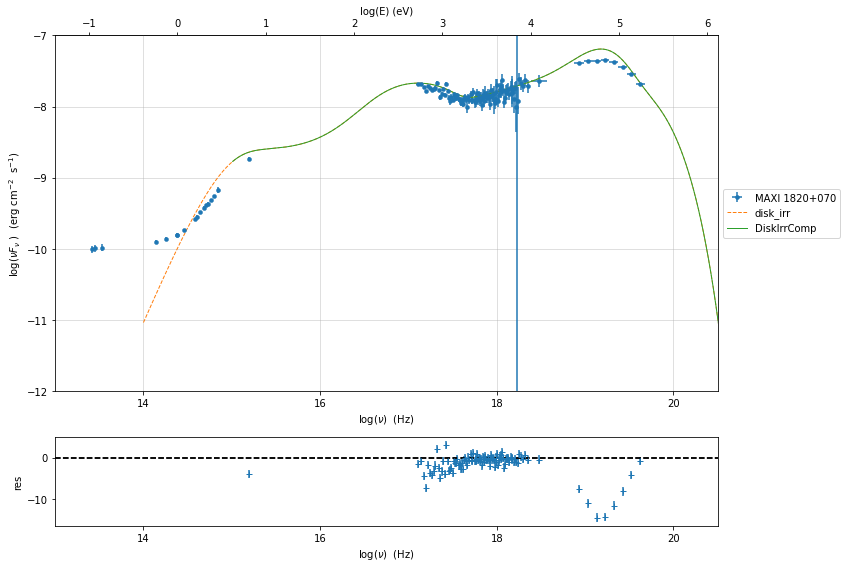

In [26]:
composite_model=set_disk_irr_model(cosmo,sed_data_deabs_unbinned_disk_corona)
composite_model.disk_irr.parameters.T_Disk.frozen=True


In [27]:
composite_model.show_model()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: DiskIrrComp  
type: composite_model  
components models:
 -model name: disk_irr model type: base_model

--------------------------------------------------------------------------------
individual component description

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: disk_irr  
type: base_model  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
disk_irr,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
disk_irr,L_Disk,bolobmetric disk lum.,erg / s,1.100000e+37,0.000000e+00,--,False,False
disk_irr,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
disk_irr,r_out,disk r_out (r_in),,5.000000e+03,1.000000e+00,--,False,False
disk_irr,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
disk_irr,L_Comp_ratio,L_Comp/L_Disk,,4.500000e+00,0.000000e+00,--,False,False
disk_irr,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
disk_irr,Ec_Comp,,keV,1.400000e+02,0.000000e+00,--,False,False
disk_irr,Gamma_Comp,,,1.650000e+00,-1.000000e+01,--,False,False
disk_irr,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [28]:
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED,ModelMinimizer
model_minimizer_lsb=ModelMinimizer('minuit')
best_fit_lsb=model_minimizer_lsb.fit(composite_model,
                                     sed_data_deabs_unbinned_disk_corona,
                                     nu_range_disk_corona[0],
                                     nu_range_disk_corona[1],
                                     fitname='composite_fit',
                                     repeat=1)




filtering data in fit range = [5.300000e+14,1.000000e+22]
data length 107

*** start fit process ***
----- 


0it [00:00, ?it/s]

/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


- best chisq=1.57317e+02

-------------------------------------------------------------------------
Fit report

Model: composite_fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
disk_irr,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
disk_irr,L_Disk,bolobmetric disk lum.,erg / s,1.122684e+37,0.000000e+00,--,False,False
disk_irr,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
disk_irr,r_out,disk r_out (r_in),,3.563626e+03,1.000000e+00,--,False,False
disk_irr,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
disk_irr,L_Comp_ratio,L_Comp/L_Disk,,4.053747e+00,0.000000e+00,--,False,False
disk_irr,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
disk_irr,Ec_Comp,,keV,1.416221e+02,0.000000e+00,--,False,False
disk_irr,Gamma_Comp,,,1.602546e+00,-1.000000e+01,--,False,False
disk_irr,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True



converged=True
calls=594
mesg=


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 157.3                      │              Nfcn = 594              │
│ EDM = 9.33e+06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│INVALID Minimum│ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │     0     │  0.6e39   │            │            │  1e+36  │  1e+39  │       │
│ 1 │ par_1 │  3.56e3   │  0.20e3   │            │            │    1    │         │       │
│ 2 │ par_2 │    4.1    │    0.5    │            │            │    4    │    5    │       │
│ 3 │ par_3 │  0.14e3   │  0.11e3   │            │            │   50    │   200   │       │
│ 4 │ par_4 │   1.60    │   0.12    │            │            │   1.6   │   1.8   │       │
│ 5 │ par_5 │    20     │    12     │            │            │   15    │   35    │       │
│ 6 │ par_6 │   -1.1    │    2.4    │            │            │   -2    │    2    │       │
│ 7 │ par_7 │  0.1e-3   │  0.5e-3   │            │            │  1e-05  │  0.001  │       │
│ 8 │ par_8 │    0.0    │    0.4    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │  1.01e+76 -1.18e+33  2.43e+30 -3.58e+31  9.74e+28  5.63e+30  9.82e+28 -1.42e+26   2.7e+28 │
│ par_1 │ -1.18e+33  3.84e+04      6.62     -13.4    -0.049      4.85   -0.0105  4.04e-05    -0.146 │
│ par_2 │  2.43e+30      6.62    0.0531    0.0464 -5.03e-05   -0.0106 -9.49e-05   1.3e-07 -3.65e-05 │
│ par_3 │ -3.58e+31     -13.4    0.0464  5.42e+03     0.044     -4.86    -0.217  2.83e-06 -4.21e-05 │
│ par_4 │  9.74e+28    -0.049 -5.03e-05     0.044  0.000564  0.000251   2.4e-05  4.15e-08  3.56e-07 │
│ par_5 │  5.63e+30      4.85   -0.0106     -4.86  0.000251      71.8     0.141  3.59e-05  1.93e-06 │
│ par_6 │  9.82e+28   -0.0105 -9.49e-05    -0.217   2.4e-05     0.141      2.72  6.67e-06  2.75e-07 │
│ par_7 │ -1.42e+26  4.04e-05   1.3e-07  2.83e-06  4.15e-08  3.59e-05  6.67e-06  9.14e-08 -4.94e-10 │
│ par_8 │   2.7e+28    -0.146 -3.65e-05 -4.21e-05  3.56e-07  1.93e-06  2.75e-07 -4.94e-10    0.0174 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=98
chisq=157.317381, chisq/red=1.605279 null hypothesis sig=0.000135

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
disk_irr,T_Disk,1.550000e+06,--,--,--,1.550000e+06,0.000000e+00,--,True
disk_irr,L_Disk,1.122684e+37,1.122684e+37,5.696505e+38,--,1.100000e+37,1.000000e+36,1.000000e+39,False
disk_irr,theta,0.000000e+00,--,--,--,0.000000e+00,0.000000e+00,9.000000e+01,True
disk_irr,r_out,3.563626e+03,3.563626e+03,1.959732e+02,--,5.000000e+03,1.000000e+00,--,False
disk_irr,r_irr,1.100000e+00,--,--,--,1.100000e+00,1.000000e+00,--,True
disk_irr,L_Comp_ratio,4.053747e+00,4.053747e+00,5.104778e-01,--,4.500000e+00,4.000000e+00,5.000000e+00,False
disk_irr,Eb_Comp,1.500000e-01,--,--,--,1.500000e-01,1.000000e-01,5.000000e-01,True
disk_irr,Ec_Comp,1.416221e+02,1.416221e+02,1.097577e+02,--,1.400000e+02,5.000000e+01,2.000000e+02,False
disk_irr,Gamma_Comp,1.602546e+00,1.602546e+00,1.150955e-01,--,1.650000e+00,1.600000e+00,1.800000e+00,False
disk_irr,alpha_Comp,1.000000e+00,--,--,--,1.000000e+00,-1.000000e+01,--,True


-------------------------------------------------------------------------



/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


In [29]:
composite_model.save_model('corona_and_disk_irr.pkl')

In [30]:
composite_model=FitModel.load_model('corona_and_disk_irr.pkl')


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)
<ipython-input-31-c6a06ff27eb6>:7: RuntimeWarning: divide by zero encountered in log10
  p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_disk),'irr. disk',line_style='--')
<ipython-input-31-c6a06ff27eb6>:10: RuntimeWarning: divide by zero encountered in log10
  p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_hump),'hump',line_style='--')


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
disk_irr,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
disk_irr,L_Disk,bolobmetric disk lum.,erg / s,1.122684e+37,0.000000e+00,--,False,False
disk_irr,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
disk_irr,r_out,disk r_out (r_in),,3.563626e+03,1.000000e+00,--,False,False
disk_irr,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
disk_irr,L_Comp_ratio,L_Comp/L_Disk,,4.053747e+00,0.000000e+00,--,False,False
disk_irr,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
disk_irr,Ec_Comp,,keV,1.416221e+02,0.000000e+00,--,False,False
disk_irr,Gamma_Comp,,,1.602546e+00,-1.000000e+01,--,False,False
disk_irr,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True


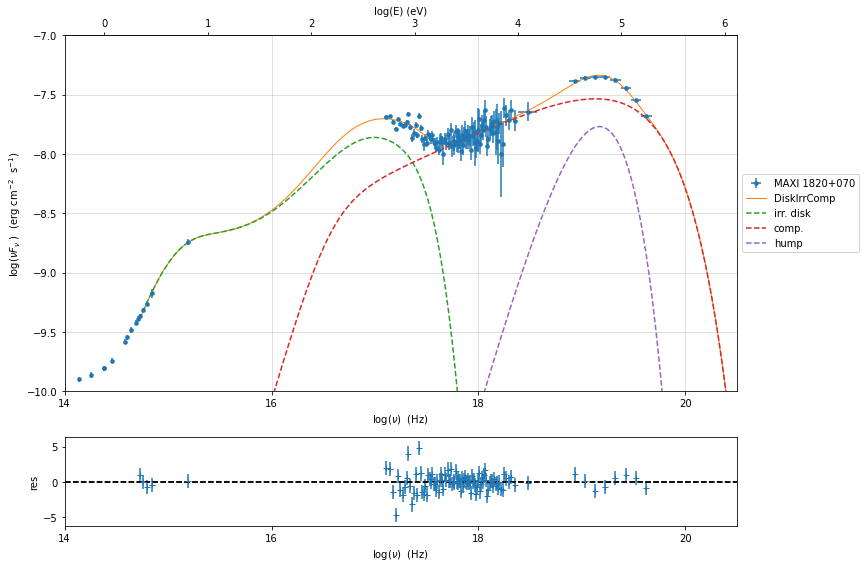

In [31]:
composite_model.eval()
nu,y=composite_model.disk_irr.SED.get_model_points(log_log=True)
composite_model.disk_irr.lin_func(10**nu)
p=composite_model.plot_model(sed_data=sed_data_deabs_unbinned_disk_corona,frame='obs',skip_components=True)
composite_model.disk_irr.lin_func(10**nu)
composite_model.disk_irr.nuFnu_disk
p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_disk),'irr. disk',line_style='--')
p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_comp), 'comp.',line_style='--')

p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_hump),'hump',line_style='--')

p.rescale(y_max=-7,y_min=-10.,x_min=14,x_max=20.5)
composite_model.show_pars()

In [32]:
T_e=(const.k_B*2.6E6*u.K).to('keV')
print(T_e)

0.22405066481577465 keV


## Corona + Disk irr +jet_acc (plc) + jet radio


In [33]:
(1+1.0)/(2-0.15)

1.081081081081081

see kaiser 2006 http://articles.adsabs.harvard.edu/pdf/2006MNRAS.367.1083K

Condition for B0 from Eq. 1 and 3 https://ui.adsabs.harvard.edu/abs/2010MNRAS.403.1457V/abstract

### Model 1  

In [34]:
jet_setup=JetSetup(M_BH=8,
                   beta=0.89,
                   q_jet=0.2,
                   eps_B0=1.0,
                   eps_Up_UB_acc=1,
                   z0_frac=50,
                   z_0_ratio=0.1,
                   m_B=1.1,
                   m_R=1.0,
                   m_N=2.0,
                   nu_t=1.5E13,
                   Fnu=.5E-23,
                   dl=9.25E21,
                   z_radio_end=1E15,
                   p=2.1,
                   N_e_p_ratio=10)

1.04e+38
z_0=1.181416e+08
R_0=1.181416e+07
theta_open=5.710593e+00
beta=8.900000e-01
BulkFactor=2.193172e+00
B_0=6.815235e+06
(1/2)L_Edd=5.200000e+38
N_p_acc=8.562412e+09
N_p_0=3.415241e+00
L_B_0=1.040000e+38
L_B_acc=3.626889e+37
L_p_acc=3.626889e+37
L_p_0=2.889163e+23
L_B_0/L_p_0=3.599658e+14
L_B_acc/L_p_acc=1.000000e+00
z_acc=2.643604e+10
z_acc=1.118829e+04 (Rs)
z_acc_start=2.349870e+10
z_acc_end=2.937338e+10
R_acc=2.643604e+09
R_acc_start=2.349870e+09
R_acc_end=2.937338e+09
B(z_acc_start)=2.018253e+04
B(z_acc_endt)=1.578972e+04
B(z_acc)=1.798612e+04
z_radio_start=2.937338e+10
z_radio_end=1.000000e+15
z_radio_frac=3.404443e+04
time to reach z_acc=4.517654e-01
time to reach z_radio_start=2.937338e+10


In [35]:
1082*(1.181416e+08/5.735281e+11)**2.2

8.408009325048984e-06

118141571.18653196 1000000000000000.0


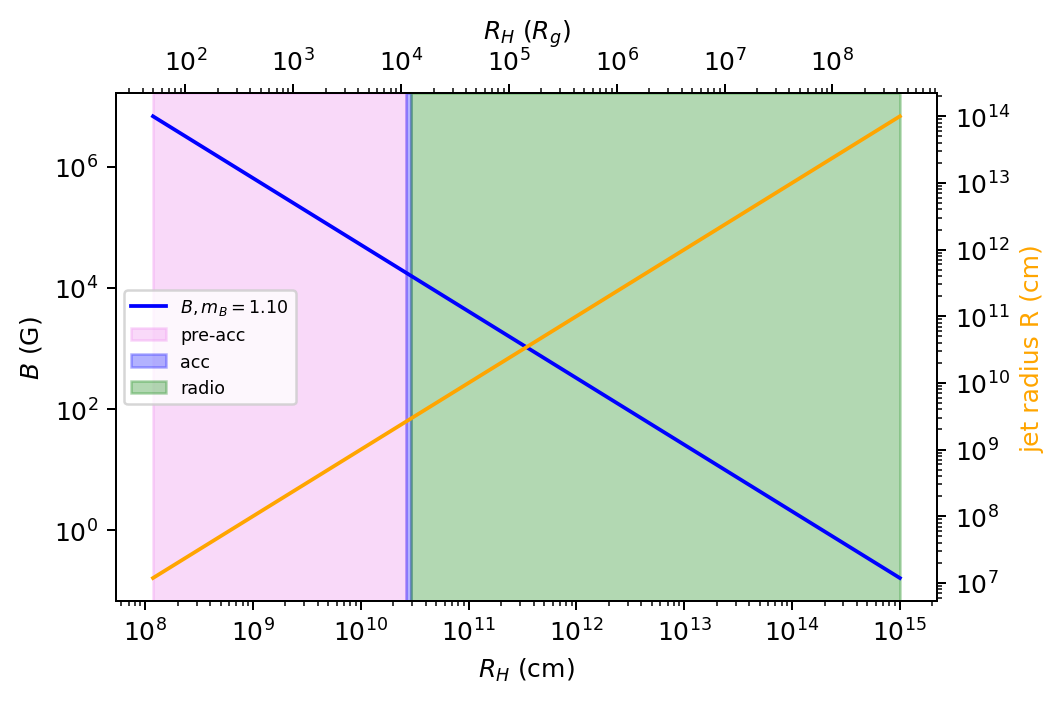

In [36]:
p=jet_setup.plot_jet_sections()

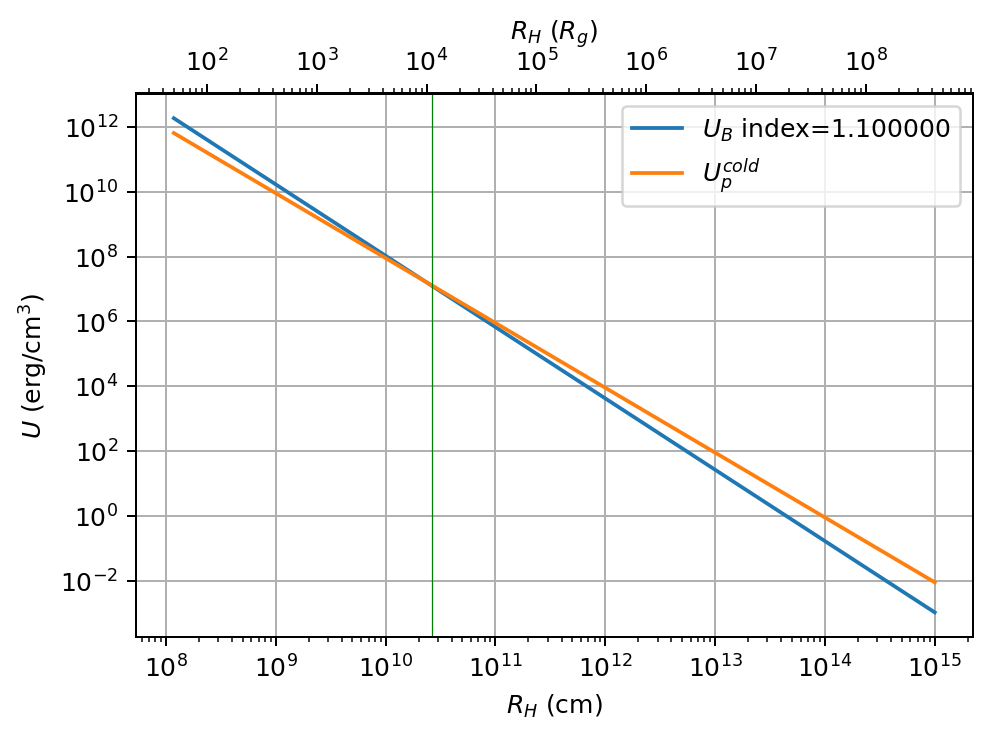

In [37]:
p=jet_setup.plot_z_acc()

/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
B_0,magnetic_field,Gauss*,6.815235e+06,0.000000e+00,--,False,True
z_0,,cm,1.181416e+08,0.000000e+00,--,False,True
z_inj,,cm,2.349870e+10,0.000000e+00,--,False,True
BulkFactor,,,2.193172e+00,0.000000e+00,--,False,True
N_frac,emitters_density ratio,,1.000000e+00,0.000000e+00,--,False,True
R_H_start_frac,jet_start_position,,1.000000e+00,0.000000e+00,--,False,True
R_H_stop_frac,jet_stop_position,,3.000000e+04,1.000000e+00,--,False,True
m_index,,None*,1.180000e+00,-4.000000e+00,4.000000e+00,False,False
gamma_cut,,None*,6.000000e+01,1.000000e+00,--,False,False
p,,None*,2.100000e+00,-1.000000e+01,1.000000e+01,False,False


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)
/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


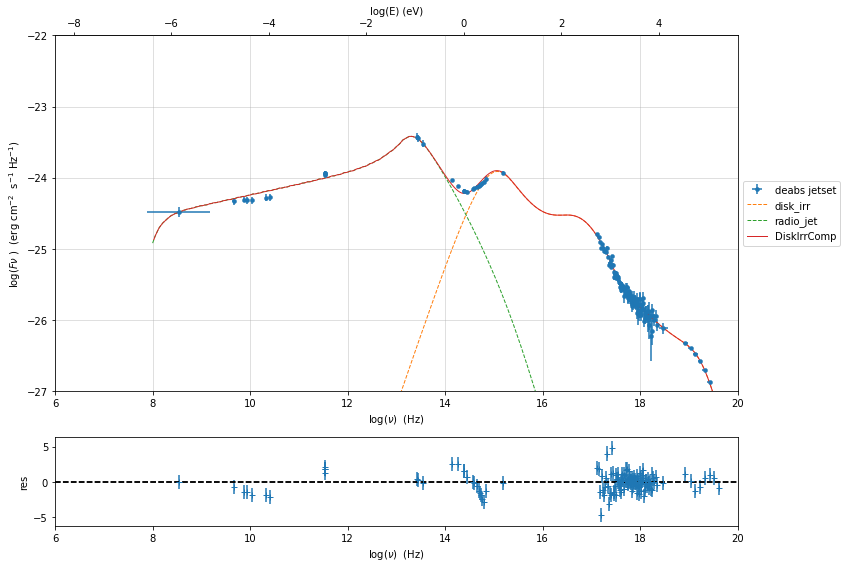

In [38]:
composite_model=set_global_model(jet_setup,
                                 sed_data_deabs_unbinned_jet,
                                 'corona_and_disk_irr.pkl',
                                 cosmo,
                                 m_index=1.18,
                                 p=2.1,
                                 gamma_cut=60,
                                 R_H_stop_frac=30000,
                                 p_frozen=False,
                                 z_inj_frozen=True,
                                 freeze_disk_irr=True)

In [39]:
composite_model.show_model_components()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: DiskIrrComp  
type: composite_model  
components models:
 -model name: disk_irr model type: base_model
 -model name: radio_jet model type: base_model

--------------------------------------------------------------------------------


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)
<ipython-input-40-cfe4a8a64229>:7: RuntimeWarning: divide by zero encountered in log10
  p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_disk),'irr. disk',line_style='--')


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
disk_irr,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
disk_irr,L_Disk,bolobmetric disk lum.,erg / s,1.122684e+37,0.000000e+00,--,False,True
disk_irr,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
disk_irr,r_out,disk r_out (r_in),,3.563626e+03,1.000000e+00,--,False,True
disk_irr,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
disk_irr,L_Comp_ratio,L_Comp/L_Disk,,4.053747e+00,0.000000e+00,--,False,True
disk_irr,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
disk_irr,Ec_Comp,,keV,1.416221e+02,0.000000e+00,--,False,True
disk_irr,Gamma_Comp,,,1.602546e+00,-1.000000e+01,--,False,True
disk_irr,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True


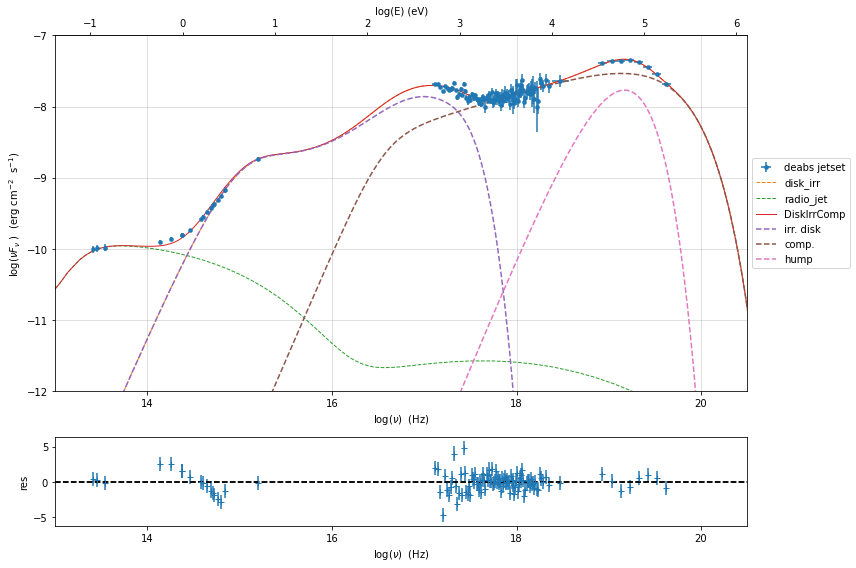

In [40]:
composite_model.eval()
nu,y=composite_model.disk_irr.SED.get_model_points(log_log=True)
composite_model.disk_irr.lin_func(10**nu)
p=composite_model.plot_model(sed_data=sed_data_deabs_unbinned_jet,frame='obs',skip_components=False)
composite_model.disk_irr.lin_func(10**nu)
composite_model.disk_irr.nuFnu_disk
p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_disk),'irr. disk',line_style='--')
p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_comp), 'comp.',line_style='--')

p.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_hump),'hump',line_style='--')

p.rescale(y_max=-7,y_min=-12.,x_min=13,x_max=20.5)
composite_model.show_pars()

In [41]:
final_report(composite_model,jet_setup)

using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero
2278002.914200688 12871682.263040695
(U_e/U_B) 0.17697787030850404
jet_setup.L_Edd= 5.2e+38
jet_setup.L_jet 1.04e+38
jet_setup.L_p_acc 3.626889241040547e+37
L_p_acc_jet= from L_p> jet_set.L_B 3.6150283952226655e+37
L_tot_no_p =(jetset.L_tot  - jetset.Lp)= 4.341319592193242e+37
L_tot = (jetset.L_tot  - jetset.Lp +L_p_acc_jet)= 7.956347987415907e+37
jetset.L_tot/jet_setup.L_Edd 0.08348691523448543
L_tot/jet_setup.L_Edd 0.15300669206569054
L_tot/jet_setup.L_je 0.7650334603284527
L_tot_no_p/jet_setup.L_jet 0.41743457617242713
L_tot_no_p/jet_setup.L_Edd 0.08348691523448543
N_p=8.562412e+09
N_e=8.097197e+11
N_e/N_p=9.456678e+01
eps_Up_UB_acc 1.003280982753429
composite_model.radio_jet.gamma_cut [60.         21.53335085 10.56306126  8.4698106   7.7269917   7.41166128
  7.26778196  7.199978    7.16753924  7.1519079   7.1443495   7.14068859
  7.138914    7.13805344  7.13763605  7.13743358  7.13

In [42]:
composite_model.components.disk_irr.parameters.f_out.frozen=False
composite_model.components.disk_irr.parameters.r_out.frozen=False
composite_model.components.disk_irr.parameters.L_Comp_ratio.frozen=False
composite_model.show_model()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: DiskIrrComp  
type: composite_model  
components models:
 -model name: disk_irr model type: base_model
 -model name: radio_jet model type: base_model

--------------------------------------------------------------------------------
individual component description

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: disk_irr  
type: base_model  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
disk_irr,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
disk_irr,L_Disk,bolobmetric disk lum.,erg / s,1.122684e+37,0.000000e+00,--,False,True
disk_irr,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
disk_irr,r_out,disk r_out (r_in),,3.563626e+03,1.000000e+00,--,False,False
disk_irr,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
disk_irr,L_Comp_ratio,L_Comp/L_Disk,,4.053747e+00,0.000000e+00,--,False,False
disk_irr,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
disk_irr,Ec_Comp,,keV,1.416221e+02,0.000000e+00,--,False,True
disk_irr,Gamma_Comp,,,1.602546e+00,-1.000000e+01,--,False,True
disk_irr,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: radio_jet  
type: base_model  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
radio_jet,B_0,magnetic_field,Gauss*,6.815235e+06,0.000000e+00,--,False,True
radio_jet,z_0,,cm,1.181416e+08,0.000000e+00,--,False,True
radio_jet,z_inj,,cm,2.349870e+10,0.000000e+00,--,False,True
radio_jet,BulkFactor,,,2.193172e+00,0.000000e+00,--,False,True
radio_jet,N_frac,emitters_density ratio,,1.000000e+00,0.000000e+00,--,False,True
radio_jet,R_H_start_frac,jet_start_position,,1.000000e+00,0.000000e+00,--,False,True
radio_jet,R_H_stop_frac,jet_stop_position,,3.000000e+04,1.000000e+00,--,False,True
radio_jet,m_index,,None*,1.180000e+00,-4.000000e+00,4.000000e+00,False,False
radio_jet,gamma_cut,,None*,6.000000e+01,1.000000e+00,--,False,False
radio_jet,p,,None*,2.100000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [43]:
model_minimizer_minuit,best_fit_minuit=gobal_fit(composite_model,sed_data_deabs_unbinned_jet,jet_setup,nu1=nu_range_jet_fit[0],nu2=nu_range_jet_fit[1],minimizer='lsb')

filtering data in fit range = [1.000000e+08,1.000000e+22]
data length 131

*** start fit process ***
----- 


0it [00:00, ?it/s]

/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


!Warning, no covariance matrix produced
- best chisq=1.95999e+02

-------------------------------------------------------------------------
Fit report

Model: composite_fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
disk_irr,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
disk_irr,L_Disk,bolobmetric disk lum.,erg / s,1.122684e+37,0.000000e+00,--,False,True
disk_irr,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
disk_irr,r_out,disk r_out (r_in),,3.150083e+03,1.000000e+00,--,False,False
disk_irr,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
disk_irr,L_Comp_ratio,L_Comp/L_Disk,,4.040076e+00,0.000000e+00,--,False,False
disk_irr,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
disk_irr,Ec_Comp,,keV,1.416221e+02,0.000000e+00,--,False,True
disk_irr,Gamma_Comp,,,1.602546e+00,-1.000000e+01,--,False,True
disk_irr,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True



converged=True
calls=122
mesg=


'The relative error between two consecutive iterates is at most 0.000000'

dof=122
chisq=195.998504, chisq/red=1.606545 null hypothesis sig=0.000024

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
disk_irr,T_Disk,1.550000e+06,--,--,--,1.550000e+06,0.000000e+00,--,True
disk_irr,L_Disk,1.122684e+37,--,--,--,1.122684e+37,1.000000e+36,1.000000e+39,True
disk_irr,theta,0.000000e+00,--,--,--,0.000000e+00,0.000000e+00,9.000000e+01,True
disk_irr,r_out,3.150083e+03,3.150083e+03,0.000000e+00,--,3.563626e+03,1.000000e+00,--,False
disk_irr,r_irr,1.100000e+00,--,--,--,1.100000e+00,1.000000e+00,--,True
disk_irr,L_Comp_ratio,4.040076e+00,4.040076e+00,0.000000e+00,--,4.053747e+00,4.000000e+00,5.000000e+00,False
disk_irr,Eb_Comp,1.500000e-01,--,--,--,1.500000e-01,1.000000e-01,5.000000e-01,True
disk_irr,Ec_Comp,1.416221e+02,--,--,--,1.416221e+02,5.000000e+01,2.000000e+02,True
disk_irr,Gamma_Comp,1.602546e+00,--,--,--,1.602546e+00,1.600000e+00,1.800000e+00,True
disk_irr,alpha_Comp,1.000000e+00,--,--,--,1.000000e+00,-1.000000e+01,--,True


-------------------------------------------------------------------------



/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)



using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero
2363568.818213383 12871682.263040695
(U_e/U_B) 0.18362547877677599
jet_setup.L_Edd= 5.2e+38
jet_setup.L_jet 1.04e+38
jet_setup.L_p_acc 3.626889241040547e+37
L_p_acc_jet= from L_p> jet_set.L_B 3.6092392100595124e+37
L_tot_no_p =(jetset.L_tot  - jetset.Lp)= 4.376877010310054e+37
L_tot = (jetset.L_tot  - jetset.Lp +L_p_acc_jet)= 7.986116220369567e+37
jetset.L_tot/jet_setup.L_Edd 0.08417071173673182
L_tot/jet_setup.L_Edd 0.15357915808403014
L_tot/jet_setup.L_je 0.7678957904201508
L_tot_no_p/jet_setup.L_jet 0.4208535586836591
L_tot_no_p/jet_setup.L_Edd 0.08417071173673182
N_p=8.562412e+09
N_e=8.138845e+11
N_e/N_p=9.505318e+01
eps_Up_UB_acc 1.0048902358513232
composite_model.radio_jet.gamma_cut [67.95193264 22.48479101 10.78234564  8.60751041  7.83982947  7.51447061
  7.36606424  7.29611119  7.26262807  7.24648363  7.23867187  7.23488558
  7.23304888  7.23215755  7.23172492  7.23151491  7.2

/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


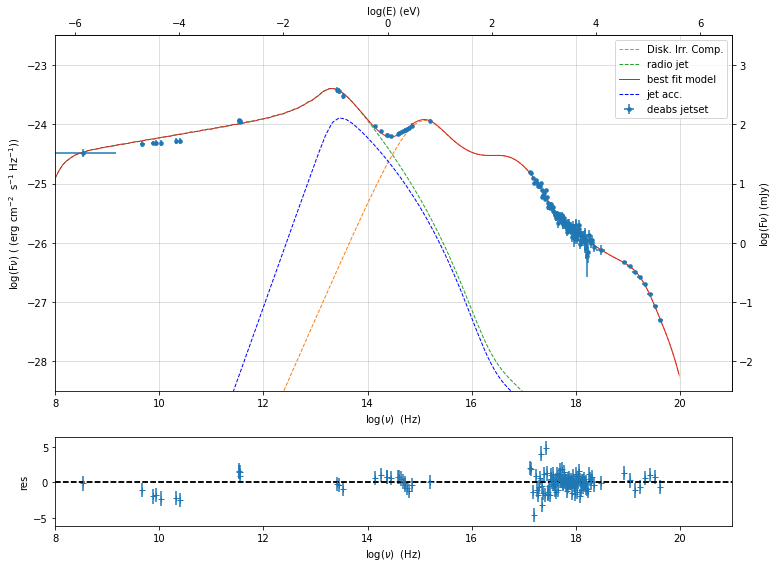

In [44]:
composite_model.nu_min_fit=nu_range_jet[0]
composite_model.nu_max_fit=1E20
composite_model.set_nu_grid(nu_range_jet[0],1E20,500)
composite_model.eval()
p1=plot_Fnu(composite_model,sed_data_deabs_unbinned_jet)

In [45]:
model_minimizer_minuit,best_fit_minuit=gobal_fit(composite_model,sed_data_deabs_unbinned_jet,jet_setup,nu1=nu_range_jet_fit[0],nu2=nu_range_jet_fit[1],minimizer='minuit')

filtering data in fit range = [1.000000e+08,1.000000e+22]
data length 131

*** start fit process ***
----- 


0it [00:00, ?it/s]

/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


- best chisq=1.94694e+02

-------------------------------------------------------------------------
Fit report

Model: composite_fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
Disk. Irr. Comp.,T_Disk,inner disk T.,k,1.550000e+06,0.000000e+00,--,False,True
Disk. Irr. Comp.,L_Disk,bolobmetric disk lum.,erg / s,1.122684e+37,0.000000e+00,--,False,True
Disk. Irr. Comp.,theta,disk incl.,deg,0.000000e+00,0.000000e+00,9.000000e+01,False,True
Disk. Irr. Comp.,r_out,disk r_out (r_in),,3.216383e+03,1.000000e+00,--,False,False
Disk. Irr. Comp.,r_irr,disk r_irr (r_in),,1.100000e+00,1.000000e+00,--,False,True
Disk. Irr. Comp.,L_Comp_ratio,L_Comp/L_Disk,,4.064278e+00,0.000000e+00,--,False,False
Disk. Irr. Comp.,Eb_Comp,,keV,1.500000e-01,0.000000e+00,--,False,True
Disk. Irr. Comp.,Ec_Comp,,keV,1.416221e+02,0.000000e+00,--,False,True
Disk. Irr. Comp.,Gamma_Comp,,,1.602546e+00,-1.000000e+01,--,False,True
Disk. Irr. Comp.,alpha_Comp,,,1.000000e+00,-1.000000e+01,--,False,True



converged=True
calls=994
mesg=


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 194.7                      │              Nfcn = 994              │
│ EDM = 9.14 (Goal: 0.0002)        │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│INVALID Minimum│ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  3.22e3   │  0.04e3   │            │            │    1    │         │       │
│ 1 │ par_1 │   4.064   │   0.014   │            │            │    4    │    5    │       │
│ 2 │ par_2 │  8.55e-3  │  0.15e-3  │            │            │    0    │         │       │
│ 3 │ par_3 │ 1.1792844 │ 0.0000011 │            │            │   0.5   │   1.5   │       │
│ 4 │ par_4 │   70.0    │    0.5    │            │            │    1    │  10000  │       │
│ 5 │ par_5 │   2.099   │   0.005   │            │            │   -10   │   10    │       │
│ 6 │ par_6 │1.004903e12│0.000007e12│            │            │    0    │         │       │
│ 7 │ par_7 │17.986169974e3│0.000000022e3│            │            │ 8993.06 │ 26979.2 │       │
│ 8 │ par_8 │2.6414820e9│0.0000023e9│            │            │1.3218e+09│3.96541e+09│       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │  1.45e+03  0.000306  -0.00105  1.18e-06   -0.0346    0.0179  7.35e+06  1.36e-07  4.21e+03 │
│ par_1 │  0.000306  0.000185 -4.59e-07 -5.31e-12  8.27e-05  1.78e-08     -46.6 -1.48e-09    0.0546 │
│ par_2 │  -0.00105 -4.59e-07  2.36e-08     2e-12  2.13e-06  3.21e-08      12.1  6.98e-12    0.0113 │
│ par_3 │  1.18e-06 -5.31e-12     2e-12  1.16e-12   3.1e-07   2.1e-09      2.33 -2.45e-12   0.00116 │
│ par_4 │   -0.0346  8.27e-05  2.13e-06   3.1e-07      0.27   0.00106  1.44e+06 -6.51e-06       948 │
│ par_5 │    0.0179  1.78e-08  3.21e-08   2.1e-09   0.00106  2.65e-05  1.13e+04  -1.1e-08      7.99 │
│ par_6 │  7.35e+06     -46.6      12.1      2.33  1.44e+06  1.13e+04  4.35e+13     -10.7  5.73e+09 │
│ par_7 │  1.36e-07 -1.48e-09  6.98e-12 -2.45e-12 -6.51e-06  -1.1e-08     -10.7  4.88e-10   -0.0092 │
│ par_8 │  4.21e+03    0.0546    0.0113   0.00116       948      7.99  5.73e+09   -0.0092  5.27e+06 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=122
chisq=194.693709, chisq/red=1.595850 null hypothesis sig=0.000032

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
Disk. Irr. Comp.,T_Disk,1.550000e+06,--,--,--,1.550000e+06,0.000000e+00,--,True
Disk. Irr. Comp.,L_Disk,1.122684e+37,--,--,--,1.122684e+37,1.000000e+36,1.000000e+39,True
Disk. Irr. Comp.,theta,0.000000e+00,--,--,--,0.000000e+00,0.000000e+00,9.000000e+01,True
Disk. Irr. Comp.,r_out,3.216383e+03,3.216383e+03,3.801487e+01,--,3.150083e+03,1.000000e+00,--,False
Disk. Irr. Comp.,r_irr,1.100000e+00,--,--,--,1.100000e+00,1.000000e+00,--,True
Disk. Irr. Comp.,L_Comp_ratio,4.064278e+00,4.064278e+00,1.361124e-02,--,4.040076e+00,4.000000e+00,5.000000e+00,False
Disk. Irr. Comp.,Eb_Comp,1.500000e-01,--,--,--,1.500000e-01,1.000000e-01,5.000000e-01,True
Disk. Irr. Comp.,Ec_Comp,1.416221e+02,--,--,--,1.416221e+02,5.000000e+01,2.000000e+02,True
Disk. Irr. Comp.,Gamma_Comp,1.602546e+00,--,--,--,1.602546e+00,1.600000e+00,1.800000e+00,True
Disk. Irr. Comp.,alpha_Comp,1.000000e+00,--,--,--,1.000000e+00,-1.000000e+01,--,True


-------------------------------------------------------------------------



/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)



using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero
2356367.164612657 12871747.947829144
(U_e/U_B) 0.1830650486758533
jet_setup.L_Edd= 5.2e+38
jet_setup.L_jet 1.04e+38
jet_setup.L_p_acc 3.626889241040547e+37
L_p_acc_jet= from L_p> jet_set.L_B 3.609244939701867e+37
L_tot_no_p =(jetset.L_tot  - jetset.Lp)= 4.375939883078003e+37
L_tot = (jetset.L_tot  - jetset.Lp +L_p_acc_jet)= 7.9851848227798695e+37
jetset.L_tot/jet_setup.L_Edd 0.08415269005919236
L_tot/jet_setup.L_Edd 0.15356124659192058
L_tot/jet_setup.L_je 0.7678062329596028
L_tot_no_p/jet_setup.L_jet 0.42076345029596185
L_tot_no_p/jet_setup.L_Edd 0.08415269005919236
N_p=8.562412e+09
N_e=8.138886e+11
N_e/N_p=9.505366e+01
eps_Up_UB_acc 1.0048886405975366
composite_model.radio_jet.gamma_cut [69.99242763 22.70370801 10.83233694  8.6392847   7.86614842  7.5386285
  7.38926519  7.31886683  7.28517162  7.26892505  7.26106384  7.25725355
  7.25540519  7.25450819  7.2540728   7.25386145  7.25

/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


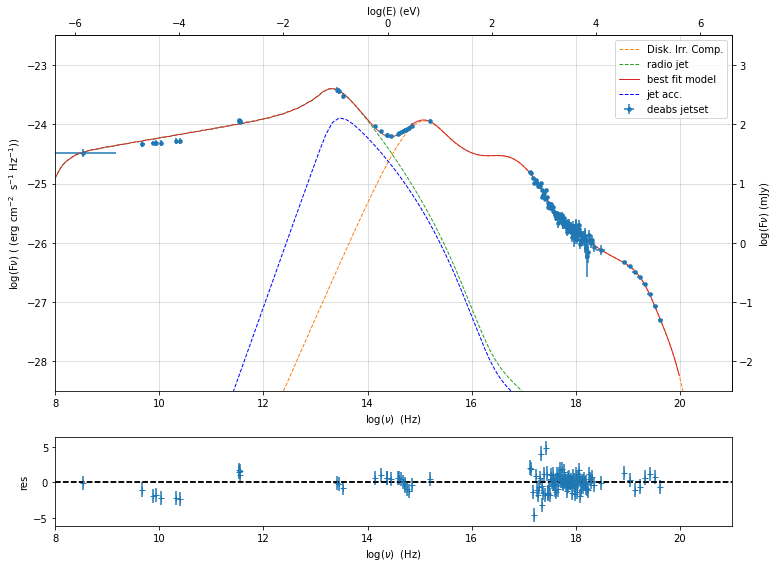

In [46]:
composite_model.nu_min_fit=nu_range_jet[0]
composite_model.nu_max_fit=1E20
composite_model.set_nu_grid(nu_range_jet[0],1E21,500)
composite_model.eval()
p1=plot_Fnu(composite_model,sed_data_deabs_unbinned_jet)

In [47]:
final_report(composite_model,jet_setup)


using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero
2356367.164612657 12871747.947829144
(U_e/U_B) 0.1830650486758533
jet_setup.L_Edd= 5.2e+38
jet_setup.L_jet 1.04e+38
jet_setup.L_p_acc 3.626889241040547e+37
L_p_acc_jet= from L_p> jet_set.L_B 3.609244939701867e+37
L_tot_no_p =(jetset.L_tot  - jetset.Lp)= 4.375939883078003e+37
L_tot = (jetset.L_tot  - jetset.Lp +L_p_acc_jet)= 7.9851848227798695e+37
jetset.L_tot/jet_setup.L_Edd 0.08415269005919236
L_tot/jet_setup.L_Edd 0.15356124659192058
L_tot/jet_setup.L_je 0.7678062329596028
L_tot_no_p/jet_setup.L_jet 0.42076345029596185
L_tot_no_p/jet_setup.L_Edd 0.08415269005919236
N_p=8.562412e+09
N_e=8.138886e+11
N_e/N_p=9.505366e+01
eps_Up_UB_acc 1.0048886405975366
composite_model.radio_jet.gamma_cut [69.99242763 22.70370801 10.83233694  8.6392847   7.86614842  7.5386285
  7.38926519  7.31886683  7.28517162  7.26892505  7.26106384  7.25725355
  7.25540519  7.25450819  7.2540728   7.25386145  7.253

In [48]:
save_fit_results('jetset_best_fit_model_1',composite_model,model_minimizer_minuit,best_fit_minuit)

In [49]:
composite_model.save_model('jetset_best_fit_model_1')

In [50]:
composite_model=FitModel.load_model('jetset_best_fit_model_1.pkl')

using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


In [51]:
#composite_model.radio_jet.jet.set_nu_grid(1E8,1E16,100)
#composite_model.eval()

using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


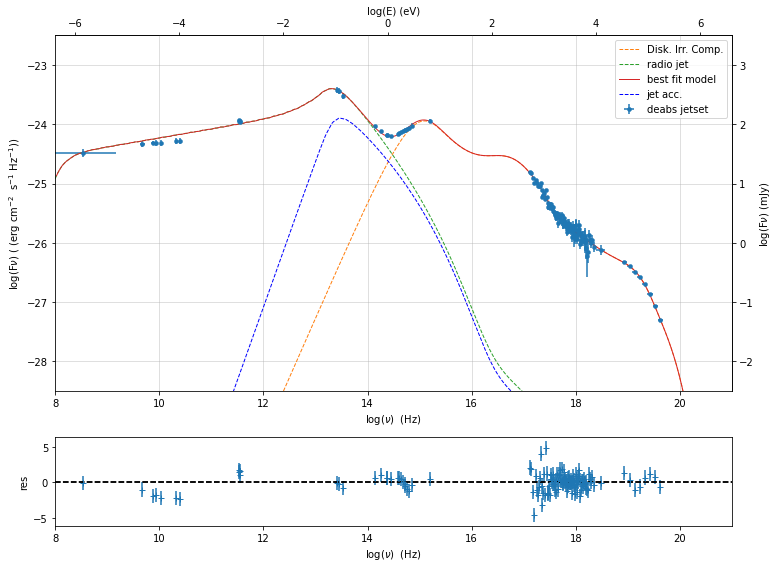

In [52]:
composite_model.nu_min_fit=nu_range_jet[0]
composite_model.nu_max_fit=1E21
composite_model.set_nu_grid(nu_range_jet[0],1E21,500)
composite_model.eval()
p1=plot_Fnu(composite_model,sed_data_deabs_unbinned_jet)

In [53]:
p1.save('jetset_best_fit_model_1_Fnu.pdf')


In [54]:
p1.fig.delaxes(p1.fig.axes[1])


In [55]:
x_axis = p1.fig.axes[0].axes.get_xaxis()

x_axis.label.set_visible(False)
x_axis.set_ticklabels([])

[Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, ''),
 Text(12.0, 0, ''),
 Text(14.0, 0, ''),
 Text(16.0, 0, ''),
 Text(18.0, 0, ''),
 Text(20.0, 0, ''),
 Text(22.0, 0, '')]

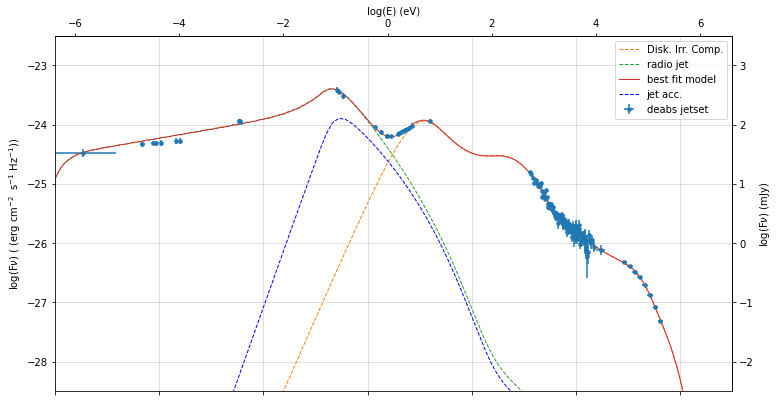

In [56]:
p1.fig

In [57]:
p1.save('jetset_best_fit_model_1_Fnu_no_res.pdf')


using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


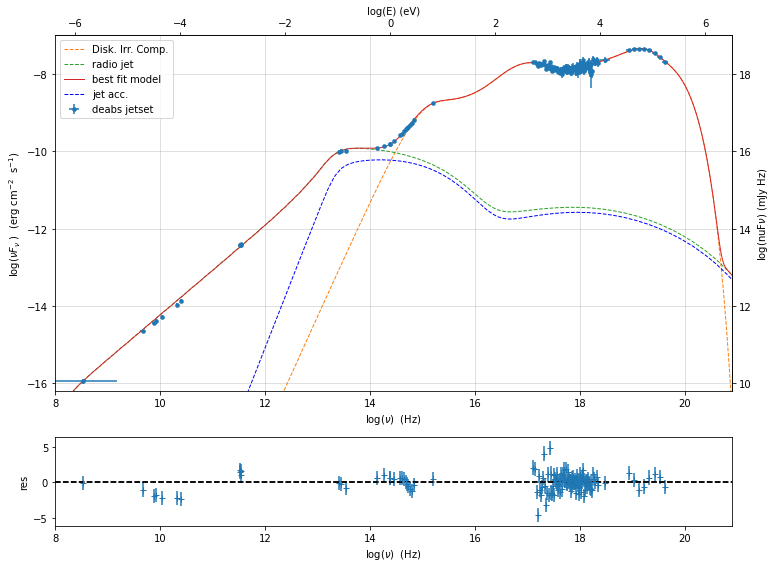

In [58]:
p2=plot_SED(composite_model,sed_data_deabs_unbinned_jet)

In [59]:
p2.save('jetset_best_fit_model_1_nuFnu.pdf')


##  Ref. rep. model over same xspec fit (fig. 5) and with unbinned data

using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


using cosmo without z and only DL, should be used only for galactic objects!!
z will be fixed to zero


/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)
/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)
<ipython-input-60-cf2e407ce2e7>:15: RuntimeWarning: divide by zero encountered in log10
  p1.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_disk),'irr. disk',line_style='--')
/Users/orion/astro/JetSeT/JetSeT_JessicaLuna/jetset_models/models.py:316: RuntimeWarning: overflow encountered in exp
  return  R / (np.exp((self.HPLANCK * nu) / (self.K_boltz *self._T(R_in,R))) - 1)


chi 158.50211141120047 107 1.61736848378776


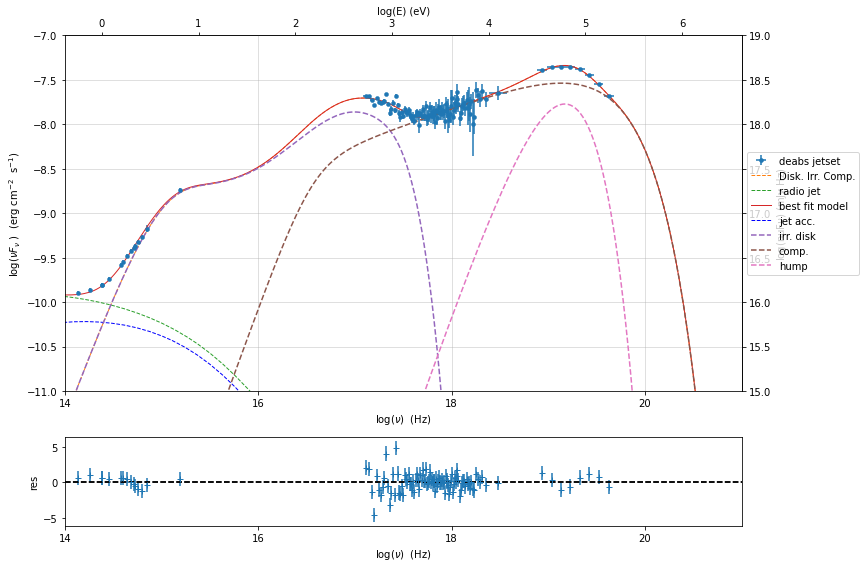

In [60]:
composite_model=FitModel.load_model('jetset_best_fit_model_1.pkl')
composite_model.nu_min_fit=1E8
composite_model.nu_max_fit=1E21
composite_model.nu_min=1E8
composite_model.nu_max=1E21
composite_model.set_nu_grid(1E8,1E21,500)
composite_model.eval()

p1=plot_SED(composite_model,sed_data_deabs_unbinned_jet,skip_sub_components=False)

nu,y=composite_model.disk_irr.SED.get_model_points(log_log=True)
composite_model.disk_irr.lin_func(10**nu)
composite_model.disk_irr.lin_func(10**nu)
#composite_model.disk_irr.nuFnu_disk
p1.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_disk),'irr. disk',line_style='--')
p1.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_comp), 'comp.',line_style='--')

p1.add_xy_plot(nu,np.log10(composite_model.disk_irr.nuFnu_hump),'hump',line_style='--')

p1.rescale(x_min=np.log10(1.0E14),y_min=-11,y_max=-7,x_max=21)
res=composite_model.get_residuals(sed_data_deabs_unbinned_jet)
delta=res[1]
delta=delta[res[0]>nu_range_disk_corona[0]]
chi=np.sum(delta**2)
free_pars=np.sum([p.frozen==False for p in composite_model.parameters.par_array])
#print(nu_range_disk_corona[0],free_pars)
print('chi',chi,len((delta)),chi/(len(delta)-free_pars))
#composite_model=set_global_model(jet_setup,m_index=1.22,p=2.1,gamma_cut=60,R_H_stop_frac=30000,p_frozen=False,z_inj_frozen=True)


In [61]:
[p.frozen==False for p in composite_model.parameters.par_array]

[False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True]

In [62]:
p.frozen==True

AttributeError: 'PlotSED' object has no attribute 'frozen'

In [ ]:
composite_model.set_nu_grid(1E14,1E21,500)
composite_model.eval()
p=composite_model.plot_model(sed_data=sed_data_deabs_unbinned_disk_corona,frame='obs')
composite_model.disk_irr.plot_model(p)
p.sedplot.axes.axvline(np.log10(7*2.4E17))
p.rescale(y_max=-7,y_min=-10.5,x_min=14,x_max=16.5)


# Model 2

In [ ]:
jet_setup=JetSetup(M_BH=8,
                   beta=0.89,
                   q_jet=0.2,
                   eps_B0=1.0,
                   eps_Up_UB_acc=1,
                   z0_frac=50,
                   z_0_ratio=0.1,
                   m_B=0.8,
                   m_R=1.0,
                   m_N=2.0,
                   nu_t=2.5E12,
                   Fnu=1E-23,
                   dl=9.25E21,
                   z_radio_end=1E15,
                   p=1.25,
                   N_e_p_ratio=10)

In [ ]:
composite_model=set_global_model(jet_setup,
                                 sed_data_deabs_unbinned_jet,
                                 'corona_and_disk_irr.pkl',
                                 cosmo,
                                 m_index=0.8,
                                 p=1.25,
                                 gamma_cut=120,
                                 R_H_stop_frac=5500,
                                 p_frozen=False,
                                 z_inj_frozen=True,
                                 freeze_disk_irr=True)

In [ ]:
model_minimizer_minuit,best_fit_minuit=gobal_fit(composite_model,sed_data_deabs_unbinned_jet)

In [ ]:
p=plot_Fnu(composite_model,sed_data_deabs)